<a href="https://colab.research.google.com/github/DavidWilliamSmith/Python/blob/main/NBA_MoneyBall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.balldontlie.io/home.html#introduction
# https://basketball-reference.com/
# official nba stats site

In [ ]:
import requests
import pandas as pd

def fetch_nba_data(endpoint, params={}):
    base_url = "https://www.balldontlie.io/api/v1/"
    response = requests.get(f"{base_url}{endpoint}", params=params)
    return response.json()

# Example: Fetching player stats
stats_data = fetch_nba_data('stats', params={'seasons': [2020], 'per_page': 100})

In [ ]:
stats_data

{'data': [{'id': 315603,
   'ast': None,
   'blk': None,
   'dreb': None,
   'fg3_pct': None,
   'fg3a': None,
   'fg3m': None,
   'fg_pct': None,
   'fga': None,
   'fgm': None,
   'ft_pct': None,
   'fta': None,
   'ftm': None,
   'game': {'id': 18060,
    'date': '2002-01-31T00:00:00.000Z',
    'home_team_id': 7,
    'home_team_score': 95,
    'period': 4,
    'postseason': False,
    'season': 2001,
    'status': 'Final',
    'time': ' ',
    'visitor_team_id': 11,
    'visitor_team_score': 91},
   'min': None,
   'oreb': None,
   'pf': None,
   'player': {'id': 1360,
    'first_name': 'Tierre',
    'height_feet': None,
    'height_inches': None,
    'last_name': 'Brown',
    'position': '',
    'team_id': 11,
    'weight_pounds': None},
   'pts': None,
   'reb': None,
   'stl': None,
   'team': {'id': 11,
    'abbreviation': 'HOU',
    'city': 'Houston',
    'conference': 'West',
    'division': 'Southwest',
    'full_name': 'Houston Rockets',
    'name': 'Rockets'},
   'turnover'

In [ ]:
import time

def fetch_all_pages(endpoint, params={}, max_pages=10):
    all_data = []
    for page in range(1, max_pages + 1):
        params['page'] = page
        data = fetch_nba_data(endpoint, params)
        all_data.extend(data['data'])
        if page == data['meta']['total_pages']:
            break
        time.sleep(1)  # Pause to respect rate limit
    return all_data

# Fetching multiple pages of stats
complete_stats = fetch_all_pages('stats', {'seasons': [2020], 'per_page': 100})

In [ ]:
complete_stats

[{'id': 315603,
  'ast': None,
  'blk': None,
  'dreb': None,
  'fg3_pct': None,
  'fg3a': None,
  'fg3m': None,
  'fg_pct': None,
  'fga': None,
  'fgm': None,
  'ft_pct': None,
  'fta': None,
  'ftm': None,
  'game': {'id': 18060,
   'date': '2002-01-31T00:00:00.000Z',
   'home_team_id': 7,
   'home_team_score': 95,
   'period': 4,
   'postseason': False,
   'season': 2001,
   'status': 'Final',
   'time': ' ',
   'visitor_team_id': 11,
   'visitor_team_score': 91},
  'min': None,
  'oreb': None,
  'pf': None,
  'player': {'id': 1360,
   'first_name': 'Tierre',
   'height_feet': None,
   'height_inches': None,
   'last_name': 'Brown',
   'position': '',
   'team_id': 11,
   'weight_pounds': None},
  'pts': None,
  'reb': None,
  'stl': None,
  'team': {'id': 11,
   'abbreviation': 'HOU',
   'city': 'Houston',
   'conference': 'West',
   'division': 'Southwest',
   'full_name': 'Houston Rockets',
   'name': 'Rockets'},
  'turnover': None},
 {'id': 315604,
  'ast': None,
  'blk': None,

In [ ]:
df = pd.DataFrame(complete_stats)
# print(df.head())
# Extracting nested data from 'player'
df['player_id'] = df['player'].apply(lambda x: x['id'])
df['first_name'] = df['player'].apply(lambda x: x['first_name'])
df['last_name'] = df['player'].apply(lambda x: x['last_name'])

# Extracting nested data from 'team', if needed
df['team_id'] = df['team'].apply(lambda x: x['id'])
df['team_abbreviation'] = df['team'].apply(lambda x: x['abbreviation'])

# Now selecting relevant columns
relevant_columns = ['player_id', 'first_name', 'last_name', 'min', 'fgm', 'fga', 'fg3m', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts', 'team_id', 'team_abbreviation']
df = df[relevant_columns]

# Handling missing values and converting data types
df = df.fillna(0)  # probably not a great idea... especially if the entire point IS the stats...
numeric_columns = ['fgm', 'fga', 'fg3m', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts']
df[numeric_columns] = df[numeric_columns].astype(float)
df.head()

,player_id,first_name,last_name,min,fgm,fga,fg3m,ftm,fta,oreb,dreb,ast,stl,blk,turnover,pf,pts,team_id,team_abbreviation
0,1360,Tierre,Brown,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,HOU
1,1304,Jason,Collier,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,HOU
2,1315,Dan,Langhi,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,HOU
3,1359,Oscar,Torres,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,HOU
4,346,Dirk,Nowitzki,44:27,6.0,20.0,0.0,1.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,1.0,13.0,7,DAL


In [ ]:
def calculate_per(row):
    pts = row['pts']
    reb = row['oreb'] + row['dreb']
    ast = row['ast']
    stl = row['stl']
    blk = row['blk']
    fga = row['fga']
    fgm = row['fgm']
    fta = row['fta']
    ftm = row['ftm']
    tov = row['turnover']

    per = (pts + reb + ast + stl + blk) - (fga - fgm) - (fta - ftm) - tov
    return per

# Applying the PER function to the DataFrame
df['PER'] = df.apply(calculate_per, axis=1)

In [ ]:
df.sample(7)

,player_id,first_name,last_name,min,fgm,fga,fg3m,ftm,fta,oreb,dreb,ast,stl,blk,turnover,pf,pts,team_id,team_abbreviation,PER
741,765,Tracy,Murray,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,TOR,0.0
88,1086,Antonio,Daniels,31:58,7.0,13.0,0.0,1.0,1.0,1.0,2.0,4.0,2.0,0.0,2.0,0.0,15.0,27,SAS,16.0
652,1234,Vonteego,Cummings,22,3.0,8.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,1.0,6.0,23,PHI,3.0
806,1369,Bobby,Simmons,25,3.0,6.0,2.0,0.0,0.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,8.0,3,BKN,9.0
688,1329,Jabari,Smith,9:17,1.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,26,SAC,3.0
327,1351,Steven,Hunter,4,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22,ORL,0.0
374,1047,Emanual,Davis,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,ATL,0.0


In [ ]:
# Sorting players by PER in descending order
overall_rankings = df.sort_values(by='PER', ascending=False)

# Selecting top players (example: top 10 players)
top_players = overall_rankings.head(10)

# Displaying the top players
print("Top Players Based on PER:")
print(top_players[['first_name', 'last_name', 'PER']])

Top Players Based on PER:
    first_name    last_name   PER
643  Shaquille       O'Neal  45.0
420    Michael       Jordan  45.0
488     Lamond       Murray  39.0
312    Dikembe      Mutombo  39.0
366        Ray        Allen  37.0
304      Tracy      McGrady  37.0
324        Pau        Gasol  37.0
6        Steve         Nash  35.0
401        Tim       Duncan  34.0
635    Shareef  Abdur-Rahim  33.0


In [ ]:
import requests
import pandas as pd
import time

def fetch_nba_data(endpoint, params={}):
    base_url = "https://www.balldontlie.io/api/v1/"
    response = requests.get(f"{base_url}{endpoint}", params=params)
    return response.json()

def fetch_all_pages(endpoint, params={}, max_pages=10):
    all_data = []
    for page in range(1, max_pages + 1):
        params['page'] = page
        data = fetch_nba_data(endpoint, params)
        all_data.extend(data['data'])
        if page == data['meta']['total_pages']:
            break
        time.sleep(1)  # Pause to respect rate limit
    return all_data

# Fetching multiple pages of stats
complete_stats = fetch_all_pages('stats', {'seasons': [2022], 'per_page': 100})
df = pd.DataFrame(complete_stats)

# Extracting nested data
df['player_id'] = df['player'].apply(lambda x: x['id'])
df['first_name'] = df['player'].apply(lambda x: x['first_name'])
df['last_name'] = df['player'].apply(lambda x: x['last_name'])
df['position'] = df['player'].apply(lambda x: x['position'] if x['position'] else 'U')

# Extract 'team_id' and 'team_abbreviation' from the 'team' dictionary
df['team_id'] = df['team'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df['team_abbreviation'] = df['team'].apply(lambda x: x['abbreviation'] if isinstance(x, dict) and 'abbreviation' in x else None)

# Ensure 'game' field is a dictionary and extract 'game_id'
df['game_id'] = df['game'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)

# Check if 'game_id', 'team_id', and 'team_abbreviation' extraction is successful
for field in ['game_id', 'team_id', 'team_abbreviation']:
    if field not in df.columns or df[field].isnull().all():
        raise ValueError(f"Failed to extract {field}. Please check the data structure.")

# Calculating Games Played for each player
games_played = df.groupby('player_id')['game_id'].nunique().reset_index()
games_played.columns = ['player_id', 'games_played']

# Merging Games Played with main DataFrame
df = df.merge(games_played, on='player_id')

# Selecting relevant columns including 'games_played'
relevant_columns = ['player_id', 'first_name', 'last_name', 'position', 'games_played', 'min', 'fgm', 'fga', 'fg3m', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts', 'team_id', 'team_abbreviation']
df = df[relevant_columns]

# Handling missing values and converting data types
df = df.fillna(0)
numeric_columns = ['fgm', 'fga', 'fg3m', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts']
df[numeric_columns] = df[numeric_columns].astype(float)

# Now you have a DataFrame with Games Played included


In [ ]:
df.sample(5).T

,756,700,63,968,813
player_id,1921,144,815,2979,2382
first_name,Dexter,Wayne,Corie,Frank,Phil
last_name,Pittman,Ellington,Blount,Kornet,Ford
position,U,G,U,U,U
games_played,1,3,3,1,2
min,2,17,12,4,32
fgm,0.0,3.0,1.0,2.0,7.0
fga,1.0,6.0,3.0,2.0,14.0
fg3m,0.0,0.0,0.0,0.0,0.0
ftm,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['player_id', 'first_name', 'last_name', 'position', 'games_played',
       'min', 'fgm', 'fga', 'fg3m', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl',
       'blk', 'turnover', 'pf', 'pts', 'team_id', 'team_abbreviation'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert necessary columns to numeric
cols_to_convert = ['min', 'pts', 'fgm', 'fga', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'turnover', 'pf']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculating League Averages
league_averages = df.agg({
    'pts': 'mean',
    'fgm': 'mean',
    'fga': 'mean',
    'ftm': 'mean',
    'fta': 'mean',
    'oreb': 'mean',
    'dreb': 'mean',
    'ast': 'mean',
    'turnover': 'mean',
    'pf': 'mean'
})

# Constants for PER calculation
league_pts = league_averages['pts']
league_fg = league_averages['fgm']
league_ft = league_averages['ftm']
league_fga = league_averages['fga']
league_fta = league_averages['fta']
league_orb = league_averages['oreb']
league_drb = league_averages['dreb']
league_trb = league_orb + league_drb
league_ast = league_averages['ast']
league_tov = league_averages['turnover']
league_pf = league_averages['pf']

# Function to calculate uPER
def calculate_uPER(row):
    if row['min'] == 0 or row['fgm'] == 0:
        return 0  # Avoid division by zero

    factor = (2 / 3) - (0.5 * (league_ast / league_fg)) / (2 * (league_fg / league_ft))
    vop = league_pts / (league_fga - league_orb + league_tov + 0.44 * league_fta)
    drbp = league_drb / league_trb

    uPER = (1 / row['min']) * (
        row['pts'] +
        (2 / 3) * row['ast'] +
        (2 - factor * (row['ast'] / row['fgm'])) * row['fgm'] +
        (row['ftm'] * 0.5 * (1 + (1 - (row['ast'] / row['fgm'])) + (2/3) * (row['ast'] / row['fgm']))) -
        vop * row['turnover'] -
        vop * drbp * (row['fga'] - row['fgm']) -
        vop * 0.44 * (0.44 + (0.56 * drbp)) * (row['fta'] - row['ftm']) +
        vop * (1 - drbp) * (row['dreb'] + row['oreb'] - row['oreb']) +
        vop * drbp * row['oreb'] +
        vop * row['stl'] +
        vop * drbp * row['blk'] -
        row['pf'] * ((league_ft / league_pf) - 0.44 * (league_fta / league_pf) * vop)
    )
    return uPER

# Calculate uPER for each player
df['uPER'] = df.apply(calculate_uPER, axis=1)

# Adjust for team pace to get aPER
league_pace = 100  # Example league pace value
df['aPER'] = df['uPER'] * (league_pace / league_pace)  # Modify pace adjustment as needed... team pace should be the denominator

# Normalize to league average to get nPER
league_aPER = df['aPER'].mean()
df['nPER'] = df['aPER'] * (15 / league_aPER)

# Now your DataFrame 'df' contains the columns 'uPER', 'aPER', and 'nPER'


In [ ]:
df.sample(10)

,player_id,first_name,last_name,position,games_played,min,fgm,fga,fg3m,ftm,...,stl,blk,turnover,pf,pts,team_id,team_abbreviation,uPER,aPER,nPER
451,918,Charlie,Ward,U,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,20,NYK,0.000000,0.000000,0.000000
141,1024,Kerry,Kittles,U,4,NaN,8.0,16.0,1.0,1.0,...,3.0,0.0,1.0,3.0,18.0,3,BKN,NaN,NaN,NaN
266,1200,Felipe,Lopez,U,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18,MIN,0.000000,0.000000,0.000000
46,886,Aaron,McKie,U,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23,PHI,0.000000,0.000000,0.000000
854,2290,John,Drew,U,1,30.0,6.0,15.0,0.0,7.0,...,0.0,0.0,6.0,4.0,19.0,1,ATL,0.755635,0.755635,23.649361
804,388,Zach,Randolph,F,1,NaN,9.0,14.0,0.0,4.0,...,0.0,0.0,4.0,1.0,22.0,15,MEM,NaN,NaN,NaN
752,1883,Lazar,Hayward,U,2,6.0,1.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,18,MIN,0.461158,0.461158,14.433013
32,1132,Austin,Croshere,U,1,NaN,2.0,7.0,0.0,4.0,...,0.0,0.0,2.0,2.0,8.0,12,IND,NaN,NaN,NaN
724,1627,Charlie,Villanueva,U,2,NaN,6.0,12.0,4.0,1.0,...,1.0,1.0,1.0,5.0,17.0,9,DET,NaN,NaN,NaN
239,1288,Eduardo,Najera,F,3,33.0,2.0,7.0,0.0,2.0,...,0.0,0.0,0.0,3.0,6.0,7,DAL,0.331585,0.331585,10.377714


In [ ]:
import pandas as pd


# Find unique positions
unique_positions = df['position'].unique()

# Dictionary to store the best players by position
best_players_by_position = {}

# Loop through each position and find the best players
for position in unique_positions:
    # Filter DataFrame for current position
    position_df = df[df['position'] == position]

    # Sort by PER in descending order
    sorted_position_df = position_df.sort_values(by='uPER', ascending=False)

    # Get top players' names and PER
    top_players = sorted_position_df[['first_name', 'last_name', 'uPER']].head(5)  # Adjust the number as needed

    # Store in dictionary
    best_players_by_position[position] = top_players

# Display the best players by position
for position, players in best_players_by_position.items():
    print(f"Position: {position}")
    print(players.to_string(index=False))
    print("\n")


Position: U
first_name last_name     uPER
   William   Bedford 4.828585
        Ed    Horton 4.000000
      Wang   Zhi-zhi 4.000000
     Duane   Ferrell 3.359712
 Dominique   Wilkins 2.526560


Position: F
first_name last_name     uPER
       Tim    Duncan 1.348444
      Tony    Battie 1.107355
     Blake   Griffin 1.077573
     Elton     Brand 1.048049
    Udonis    Haslem 0.795954


Position: G
first_name last_name     uPER
     Shawn    Marion 1.409064
     Bobby   Jackson 1.301923
  Vonteego  Cummings 1.235226
    Jeremy       Lin 0.956878
      Mike     Bibby 0.799145


Position: F-G
first_name last_name     uPER
    Wesley   Johnson 0.183707
     Vince    Carter 0.000000


Position: C
first_name last_name     uPER
     Tyson  Chandler 0.994421
   DeAndre    Jordan 0.679145
      Raef  LaFrentz 0.592201
      Raef  LaFrentz 0.501654
      Greg    Monroe 0.422921


Position: C-F
first_name last_name     uPER
       Pau     Gasol 1.112692
       Pau     Gasol 0.859614
      Ekpe    

In [ ]:
unique_per = df['nPER'].unique()
unique_per

array([            nan,  4.67288772e+00,  0.00000000e+00,  8.02086453e+00,
        1.92663542e+01,  1.88374557e+01,  1.37682735e+01,  7.73186509e+01,
        1.92190932e+01,  1.09722325e+01,  2.02960669e+01,  1.71734290e+01,
        3.30870876e+01,  1.96723287e+01,  1.34928167e+01,  1.68988191e+01,
        5.49752454e+01,  2.20579003e+01,  8.80850959e+00,  6.68511305e+00,
        7.14937849e+00,  2.07844198e+01,  2.50110922e+01,  1.52904585e+01,
        8.36597467e+00,  1.85251647e+01,  4.07467150e+01,  8.27547017e+00,
        3.20344946e+01,  3.08350053e+01,  2.03262650e+01,  1.26249670e+00,
        8.89045938e+00,  1.69225523e+01,  1.60483010e+01,  1.72595569e+01,
        1.16736037e+01,  1.02820080e+01,  7.67998467e+00,  1.76722957e+01,
        2.61642984e+01,  3.08026950e+01,  1.90350674e+01,  4.52353821e+01,
        4.88961377e+01,  3.16765630e+01,  1.83953828e+01,  3.09237332e+01,
        1.66081365e+01,  9.67166784e+00,  8.37298651e+00,  3.86592738e+01,
        1.02121458e+01,  

In [ ]:
df.columns

Index(['player_id', 'first_name', 'last_name', 'position', 'games_played',
       'min', 'fgm', 'fga', 'fg3m', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl',
       'blk', 'turnover', 'pf', 'pts', 'team_id', 'team_abbreviation', 'uPER',
       'aPER', 'nPER'],
      dtype='object')

In [ ]:
# Define the year you are interested in
target_year = 2020  # Example year

# Assuming you have a way to map 'games_played' to 'target_year'
# For this example, let's assume players with games_played > 0 were active in 'target_year'
active_players_df = df[df['games_played'] > 0]

# Create a new DataFrame for the active players

season2020_df = active_players_df.copy()  # Replace with '2020_df' or similar as needed

# Display the new DataFrame
print(season2020_df)

     player_id first_name     last_name position  games_played   min  fgm  \
0          795       Doug      Christie        U             3   NaN  3.0   
1          795       Doug      Christie        U             3   NaN  4.0   
2          795       Doug      Christie        U             3  29.0  2.0   
3         1162       Peja    Stojakovic        U             4   0.0  0.0   
4         1162       Peja    Stojakovic        U             4   0.0  0.0   
..         ...        ...           ...      ...           ...   ...  ...   
995        499        Dan       Schayes        U             1  34.0  7.0   
996       3063       Paul       Mokeski        U             1   6.0  1.0   
997       2866        Hot  Rod,Williams        U             1  30.0  8.0   
998        525       Todd        Lichti        U             1   5.0  0.0   
999        589       T.R.          Dunn        U             1  19.0  1.0   

      fga  fg3m  ftm  ...  stl  blk  turnover   pf   pts  team_id  \
0    1

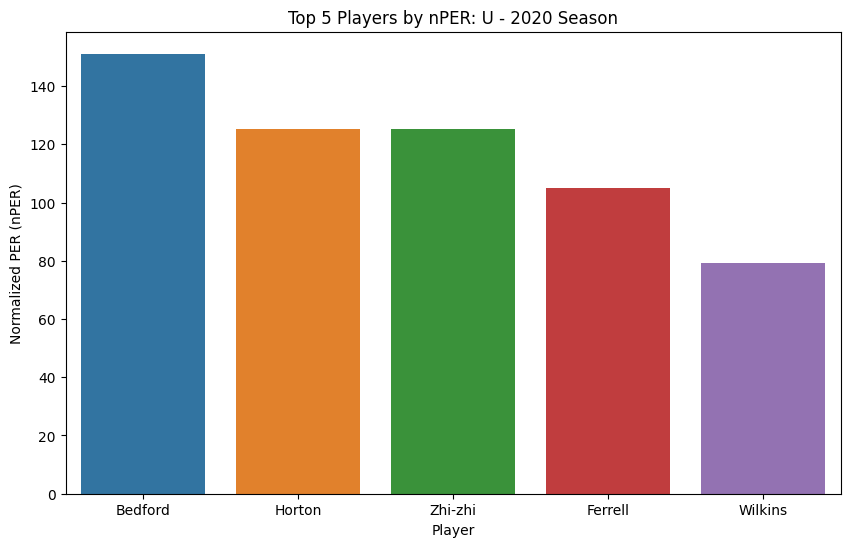

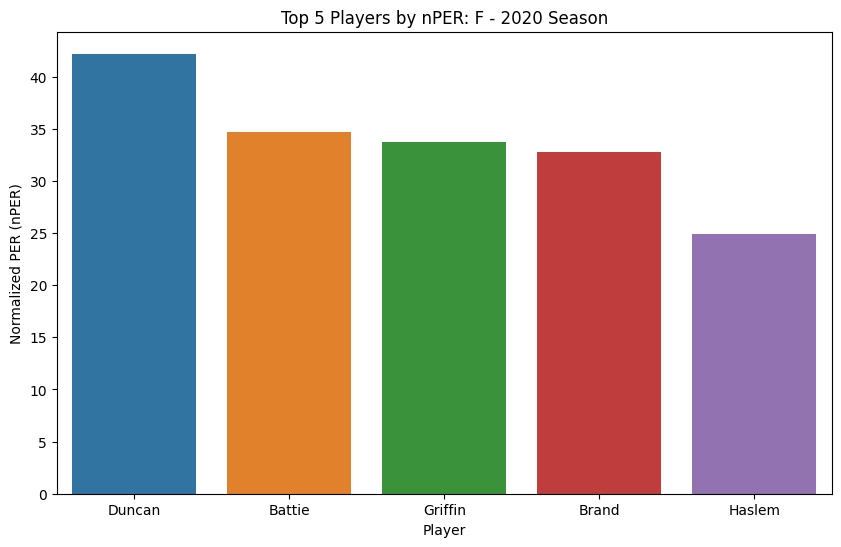

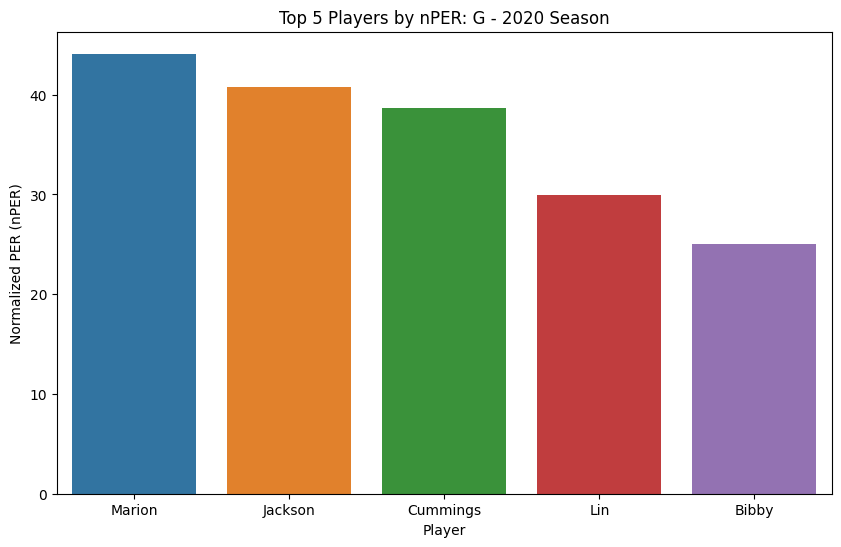

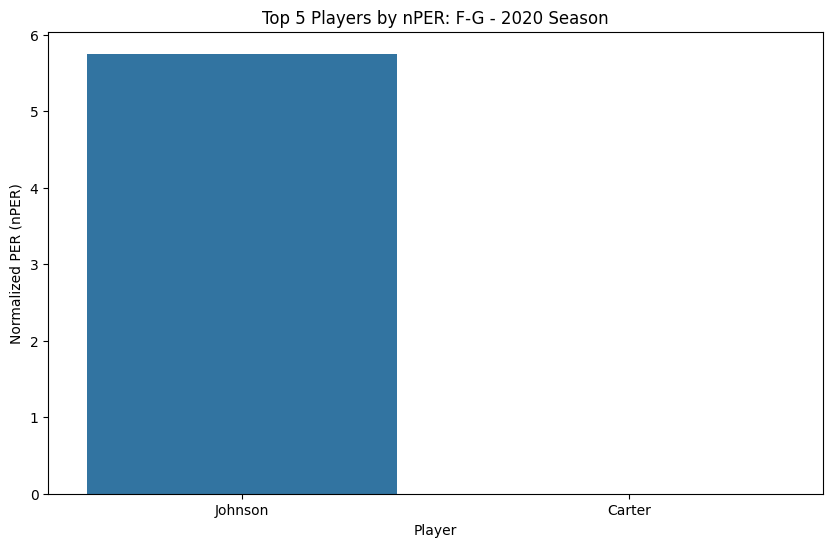

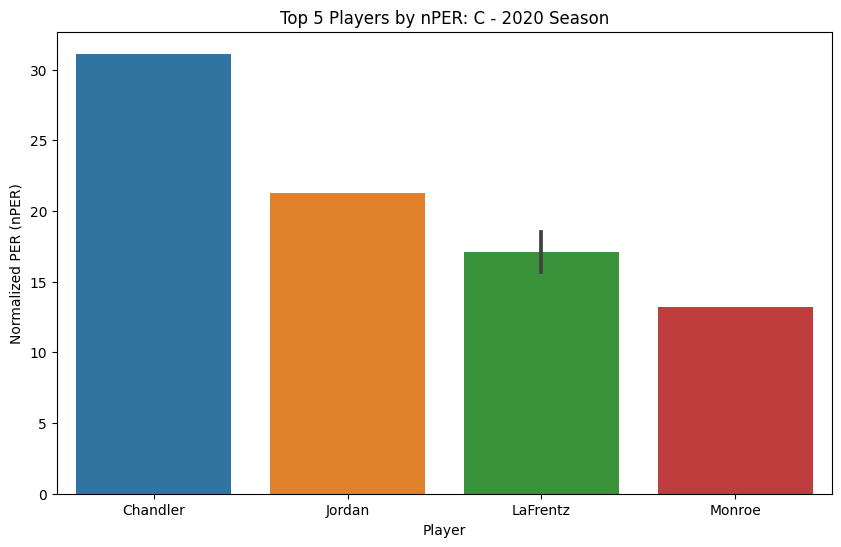

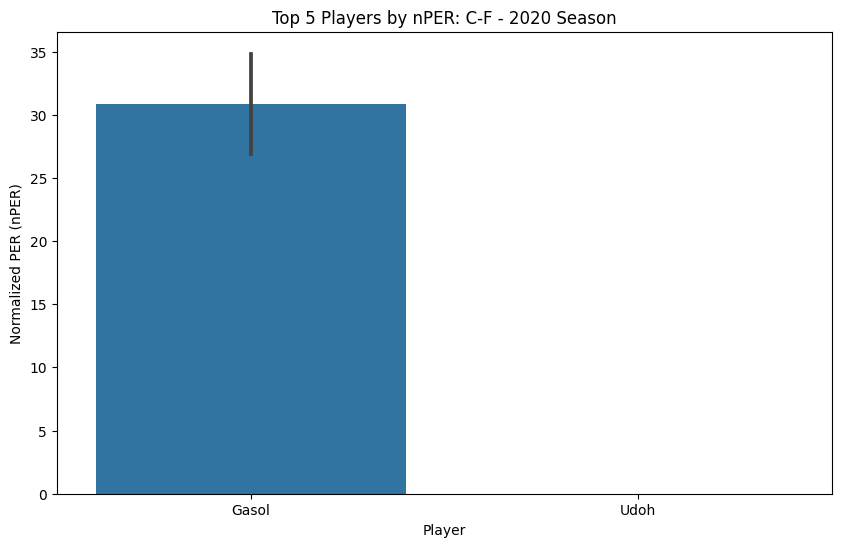

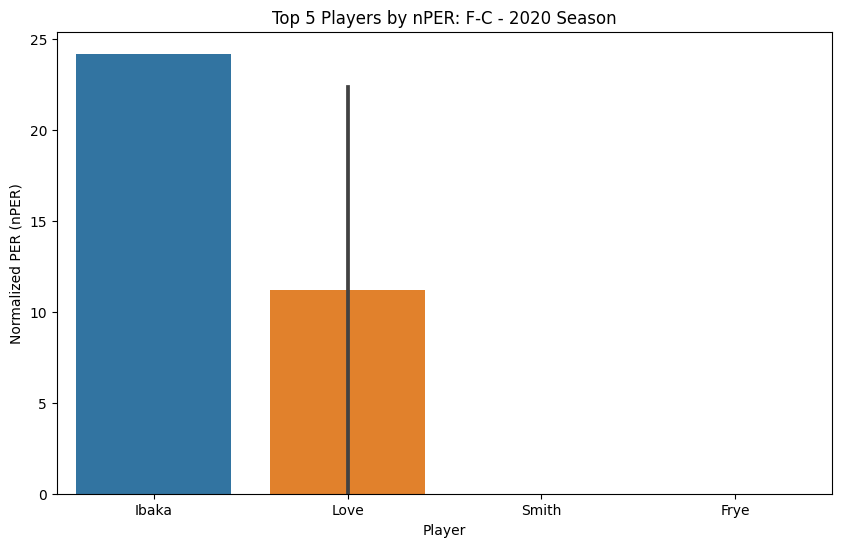

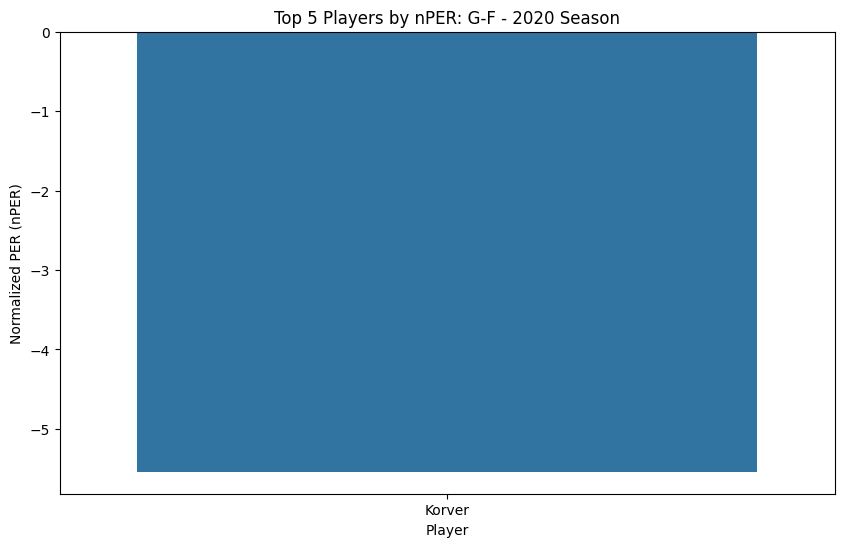

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find unique positions
unique_positions = season2020_df['position'].unique()

# Dictionary to store the top players by position
top_players_by_position = {}

# Loop through each position and find the top players
for position in unique_positions:
    # Filter DataFrame for current position
    position_df = season2020_df[season2020_df['position'] == position]

    # Sort by nPER in descending order and get the top 5 players
    top_players = position_df.sort_values(by='nPER', ascending=False).head(5)

    # Store in the dictionary
    top_players_by_position[position] = top_players

    # Create a visual for each position
    plt.figure(figsize=(10, 6))
    sns.barplot(x='last_name', y='nPER', data=top_players)
    plt.title(f'Top 5 Players by nPER: {position} - 2020 Season')
    plt.xlabel('Player')
    plt.ylabel('Normalized PER (nPER)')
    plt.show()
